# INTRODUÇÃO A BIBLIOTECA PANDAS

Dentre as diversas bibliotecas disponíveis no repositório PyPI, pandas é um pacote Python que fornece estruturas de dados projetadas para facilitar o trabalho com dados estruturados (tabelas) e de séries temporais (https://pandas.pydata.org/docs/getting_started/overview.html). Esse pacote começou a ser desenvolvido em 2008, tornando-se uma solução open source no final de 2009. Desde 2015, o projeto pandas é patrocinado pela NumFOCUS (https://pandas.pydata.org/about/). Segundo sua documentação oficial, pandas pretende ser o alicerce de alto nível fundamental para uma análise prática, a dos dados do mundo real em Python. Além disso, ele tem o objetivo mais amplo de se tornar a ferramenta de análise/manipulação de dados de código aberto, mais poderosa e flexível disponível em qualquer linguagem de programação.

Para utilizar a biblioteca pandas é preciso fazer a instalação, como mostra a Figura 4.1: pip install pandas (caso esteja usando conda, verificar documentação). No momento em que esse material está sendo produzido, a biblioteca encontra-se na versão 1.0.4 e teve sua última atualização disponibilizada no dia 29 de maio de 2020 (Figura 4.1).

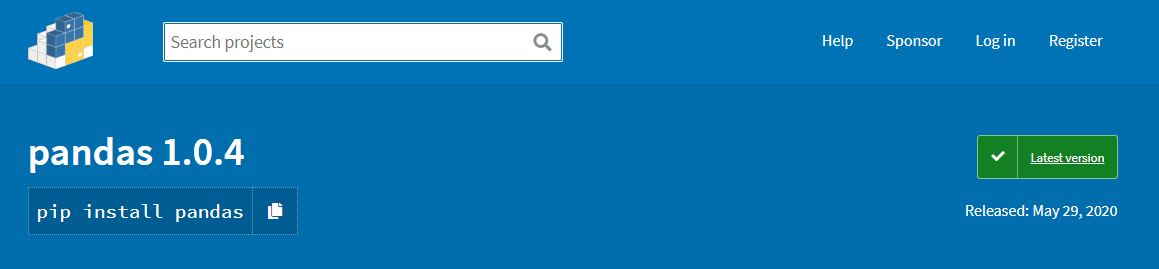

In [2]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Como uma ferramenta de alto nível, pandas possui duas estruturas de dados que são as principais para a análise/manipulação de dados: a Series e o DataFrame. Uma Series é um como um vetor de dados (unidimencional), capaz de armazenar diferentes tipos de dados. Um DataFrame é conjunto de Series, ou como a documentação apresenta, um contêiner para Series. Ambas estruturas, possuem como grande característica, a indexação das linhas, ou seja, cada linha possui um rótulo (nome) que o identifica, o qual pode ser uma string, uma inteiro, um decimal ou uma data. A Figura 4.2 ilustra uma Series (A) e um DataFrame (B). Veja que uma Series possui somente "uma coluna" de informação e seus rótulos (índices). Um DataFrame pode ter uma ou mais colunas e além dos índices, também há um rótulo de identificação com o nome da coluna. Podemos comparar um DataFrame como uma planilha eletrônico, como o Excel (da Microsoft) ou o Calc (do Open Office).

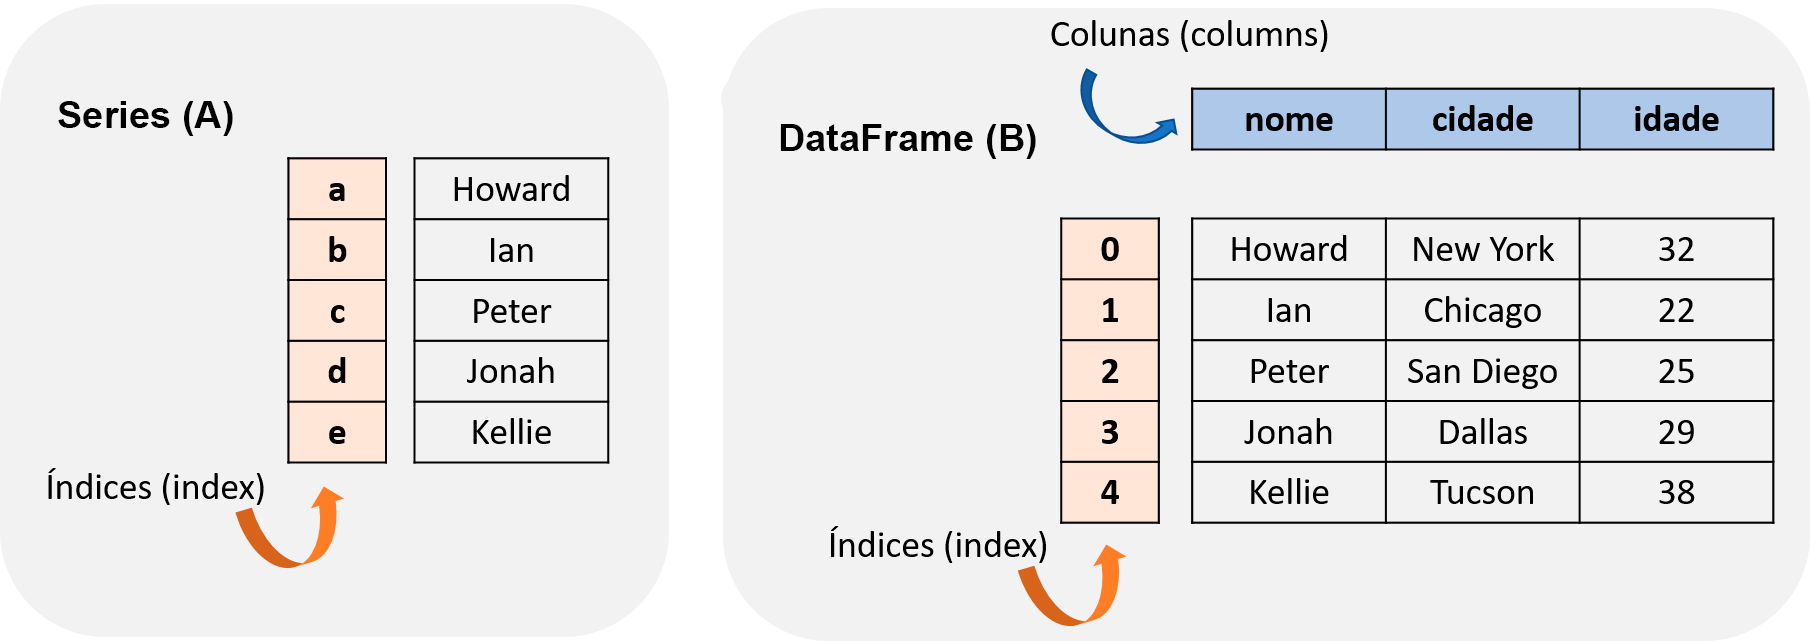

Para finalizar nossa introdução ao paradigma OO, vamos falar do polimorfismo.
Agora que já temos essa visão inicial, vamos começar a colocar a mão na massa! Começaremos aprendendo a criar Series e DataFrames, a partir de estruturas de dados em Python como listas e dicionários. Na próxima seção vamos aprender a trabalhar com fontes externas de dados. Após criarmos as estruturas do pandas, vamos ver como como extrair informações estatísticas básicas, bem como extrair informações gerais da estrutura e selecionar colunas específicas.

# DICA

Na Internet você pode encontrar diversas "cheat sheet" (folha de dicas) sobre a biblioteca pandas. Recomendamos a cheat sheet oficial da biblioteca, disponível no endereço https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Vamos importar a biblioteca antes de começar nossa primeira linha de código. Por convenção, a biblioteca é importada com o apelido (as) pd. Logo, para utilizar as funcionalidades, vamos utilizar a sintaxe pd.funcionalidade.

In [3]:
import pandas as pd

# SERIES

Para construir um objeto do tipo Series, precisamos utilizar o método Series() do pacote pandas. O método possui o seguinte construtor: pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False). Veja que todos os parâmetros possuem valores padrões (default) o que permite instanciar um objeto de diferentes formas. Para endender cada parâmetro, a melhor fonte de informações é a documentação oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

Dentre todos os parâmetros esperados, somente um é obrigatório para se criar uma Series com dados (se for uma Series sem dados, nenhum parâmetro é obrigatório), o parâmetro data=XXXX. Esse parâmetro pode receber, um simples valor (inteiro, string, float), uma lista de valores, ou um dicionário, vejamos os exemplos.

In [4]:
pd.Series(data=5) # Cria uma Series com o valor a

0    5
dtype: int64

In [5]:
lista_nomes = 'Howard ian Peter Jonah Kellie'.split()

pd.Series(lista_nomes) # Cria uma Series com uma lista de nomes

0    Howard
1       ian
2     Peter
3     Jonah
4    Kellie
dtype: object

In [6]:
dados = {
    'nome1': 'Howard',
    'nome2': 'Ian',
    'nome3': 'Peter',
    'nome4': 'Jonah',
    'nome5': 'Kellie',
}

pd.Series(dados) # Cria uma Series com um dicionário

nome1    Howard
nome2       Ian
nome3     Peter
nome4     Jonah
nome5    Kellie
dtype: object

Na entrada 2, criamos uma Series com um único valor, veja que aparece 0 como índice e 5 como valor. Quando não deixamos explícito os rótulos (índices) que queremos usar é construído um range de 0 até N-1, onde N é a quantidade de valores. Outro detalhe interessante é o dtype (data type), que foi identificado como int64, nesse caso, já que temos somente um valor inteiro no objeto.

Na entrada 3, criamos uma Series a partir de uma lista de nomes, veja que agora os índices variam de 0 até 4 e o dtype é "object". Esse tipo de dado é usado para representar texto ou valores numéricos e não numéricos combinados.

Na entrada 4, criamos uma Series a partir de um dicionário, a grande diferença desse tipo de dado na construção é que a chave do dicionário é usada como índice.

Outra forma de construir a Series é passando os dados e os rótulos que desejamos usar. Veja na entrada 5 essa construção, na qual utilizamos uma lista de supostos cpfs para rotular os valores da Series.

In [7]:
cpfs = '111.111.111-11 222.222.222-22 333.333.333-33 444.444.444-44 555.555.555-55'.split()

pd.Series(lista_nomes, index=cpfs)

111.111.111-11    Howard
222.222.222-22       ian
333.333.333-33     Peter
444.444.444-44     Jonah
555.555.555-55    Kellie
dtype: object

Rotular as Series (e como veremos os DataFrames), é interessante para facilitar a localização e manipulação dos dados. Por exemplo, se quiséssemos saber o nome da pessoa com cpf 111.111.111-11, poderíamos localizar facilmente essa informação com o atributo loc, usando a seguinte sintaxe: series_dados.loc[rotulo], onde rótulo é índice a ser localizado. Veja o código a seguir na entrada 6, criamos uma Series com a lista de nomes e guardados dentro uma variável chamada series_dados. Na linha 3, com o atributo loc, localizamos a informação com índice '111.111.111-11'. Veremos mais sobre essa questão de filtrar informações, ao longo das aulas.

In [8]:
series_dados = pd.Series(lista_nomes, index=cpfs)

series_dados.loc["111.111.111-11"]

'Howard'

# EXTRAINDO INFORMAÇÕES DE UMA SERIES

Já sabemos que estruturas de dados são utilizadas para armazenar dados e que, diferentes estruturas possuem diferentes atributos e métodos. Com as estruturas de dados do pandas não é diferente, tais objetos possuem atributos e métodos específicos, vamos conhecer alguns. Na entrada 7, criamos uma série contando números e um valor nulo (None). As informações extraídas das linhas 3 a 7, são mais com relação a "forma" dos dados, portanto poderiam ser usadas independente do tipo de dado armazenado na Series, inclusive em um cenário de dados com diferentes tipos. Já as informações das linhas 9 a 15, como se tratam de funções matemáticas e estatísticas, podem fazer mais sentido quando utilizadas para tipos numéricos. Verifique no comentário a frente de cada comando, o que ele faz. Vale a pena ressaltar a diferença entre o atributo shape e o método count(). O primeiro verifica quantas linhas a Series possui (quantos índices), já o segundo, conta quantos dados não nulos existem.

In [9]:
series_dados = pd.Series([10.2, -1, None, 15, 23.4])

print('Quantidade de linhas = ', series_dados.shape) # Retorna uma tupla com o número de linhas
print('Tipo de dados', series_dados.dtypes) # Retorna o tipo de dados, se for misto será object
print('Os valores são únicos?', series_dados.is_unique) # Verifica se os valores são únicos (sem duplicações)
print('Existem valores nulos?', series_dados.hasnans) # Verifica se existem valores nulos
print('Quantos valores existem?', series_dados.count()) # Conta quantas valores existem (exclui os nulos)

print('Qual o menor valor?', series_dados.min()) # Extrai o menor valor da Series (nesse caso os dados precisam ser do mesmo tipo)
print('Qual o maior valor?', series_dados.max()) # Extrai o valor máximo, com a mesma condição do mínimo
print('Qual a média aritmética?', series_dados.mean()) # Extrai a média aritmética de uma Series numérica
print('Qual o desvio padrão?', series_dados.std()) # Extrai o desvio padrão de uma Series numérica
print('Qual a mediana?', series_dados.median()) # Extrai a mediana de uma Series numérica

print('\nResumo:\n', series_dados.describe()) # Exibe um resumo sobre os dados na Series

Quantidade de linhas =  (5,)
Tipo de dados float64
Os valores são únicos? True
Existem valores nulos? True
Quantos valores existem? 4
Qual o menor valor? -1.0
Qual o maior valor? 23.4
Qual a média aritmética? 11.899999999999999
Qual o desvio padrão? 10.184301645179211
Qual a mediana? 12.6

Resumo:
 count     4.000000
mean     11.900000
std      10.184302
min      -1.000000
25%       7.400000
50%      12.600000
75%      17.100000
max      23.400000
dtype: float64


# DATA FRAME

Para construir um objeto do tipo DataFrame, precisamos utilizar o método DataFrame() do pacote pandas. O método possui o seguinte construtor: pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False). Veja que todos os parâmetros possuem valores padrões (default) o que permite instanciar um objeto de diferentes formas. Para endender cada parâmetro, a melhor fonte de informações é a documentação oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html.

Dentre todos os parâmetros esperados, somente um é obrigatório para se criar um DataFrame com dados, o parâmetro data=XXXX. Esse parâmetro pode receber, um objeto iterável, como uma lista, tupla, um dicionário ou um DataFrame, vejamos os exemplos.

# CONSTRUTOR DATAFRAME COM LISTA

Na entrada 8, criamos 4 listas, com mesmo tamanho (5 valores) que vamos usar como fonte de dados para criar os primeiros DataFrames. Na entrada 9, estamos invocando o método DataFrame e passando como parâmetro a lista de nomes e um nome (rótulo) para a coluna. Veja o resultado, temos os dados na coluna e os índices, que como não especificamos é atribuído o range de 0 a N-1. Na entrada 10, criamos o mesmo DataFrame, mas agora passando a lista de cpfs como índice. Na entrada 11, usamos a função zip() parar criar tuplas, cada uma composta por um valor de cada lista, e a transformamos em uma lista de tuplas. Fizemos essa construção para criar um DataFrame, no qual cada lista passe a ser uma coluna, conforme pode ser observdo no resultado.

In [10]:
lista_nomes = 'Howard Ian Peter Jonah Kellie'.split()
lista_cpfs = '111.111.111-11 222.222.222-22 333.333.333-33 444.444.444-44 555.555.555-55'.split()
lista_emails = 'risus.varius@dictumPhasellusin.ca Nunc@vulputate.ca fames.ac.turpis@cursusa.org non@felisullamcorper.org eget.dictum.placerat@necluctus.co.uk'.split()
lista_idades = [32, 22, 25, 29, 38]

In [11]:
pd.DataFrame(lista_nomes, columns=['nome'])

,nome
0,Howard
1,Ian
2,Peter
3,Jonah
4,Kellie


In [13]:
pd.DataFrame(lista_nomes, columns=['nome'], index=lista_cpfs)

,nome
111.111.111-11,Howard
222.222.222-22,Ian
333.333.333-33,Peter
444.444.444-44,Jonah
555.555.555-55,Kellie


In [15]:
dados = list(zip(lista_nomes, lista_cpfs, lista_idades, lista_emails)) # cria uma lista de tuplas
print(dados)
pd.DataFrame(dados, columns=['nome', 'cpfs', 'idade', 'email'])

[('Howard', '111.111.111-11', 32, 'risus.varius@dictumPhasellusin.ca'), ('Ian', '222.222.222-22', 22, 'Nunc@vulputate.ca'), ('Peter', '333.333.333-33', 25, 'fames.ac.turpis@cursusa.org'), ('Jonah', '444.444.444-44', 29, 'non@felisullamcorper.org'), ('Kellie', '555.555.555-55', 38, 'eget.dictum.placerat@necluctus.co.uk')]


,nome,cpfs,idade,email
0,Howard,111.111.111-11,32,risus.varius@dictumPhasellusin.ca
1,Ian,222.222.222-22,22,Nunc@vulputate.ca
2,Peter,333.333.333-33,25,fames.ac.turpis@cursusa.org
3,Jonah,444.444.444-44,29,non@felisullamcorper.org
4,Kellie,555.555.555-55,38,eget.dictum.placerat@necluctus.co.uk


# CONSTRUTOR DATAFRAME COM DICIONÁRIO

DataFrames também podem ser construídos a partir de estruturas de dados do tipo dicionário. Cada chave será uma coluna e pode ter atribuída uma lista de valores. Obs: cada chave deve estar associada a uma lista de mesmo tamanho. Na entrada 12, criamos nosso dicionário de dados, veja que cada chave possui uma lista de mesmo tamanho e criamos nosso DataFrame, passando o dicionário como fonte de dados. Dessa forma o construtor já consegue identificar o nome das colunas.

In [16]:
dados = {
    'nomes': 'Howard Ian Peter Jonah Kellie'.split(),
    'cpfs' : '111.111.111-11 222.222.222-22 333.333.333-33 444.444.444-44 555.555.555-55'.split(),
    'emails' : 'risus.varius@dictumPhasellusin.ca Nunc@vulputate.ca fames.ac.turpis@cursusa.org non@felisullamcorper.org eget.dictum.placerat@necluctus.co.uk'.split(),
    'idades' : [32, 22, 25, 29, 38]
}

pd.DataFrame(dados)

,nomes,cpfs,emails,idades
0,Howard,111.111.111-11,risus.varius@dictumPhasellusin.ca,32
1,Ian,222.222.222-22,Nunc@vulputate.ca,22
2,Peter,333.333.333-33,fames.ac.turpis@cursusa.org,25
3,Jonah,444.444.444-44,non@felisullamcorper.org,29
4,Kellie,555.555.555-55,eget.dictum.placerat@necluctus.co.uk,38


# EXTRAINDO INFORMAÇÕES DE UM DATAFRAME

Como já mencionamos, cada objeto possui seus próprios atributos e métodos, logo, embora Series e DataFrame tenham recursos em comum, eles também possuem suas particularidades. No DataFrame temos o método info() que mostra quantas linhas e colunas existem. Também exibe o tipo de cada coluna e quantos valores não nulos existem ali. Esse método também retorna uma informação sobre a quantidade de memória RAM que essa estrutura está ocupando. Faça a leitura dos comentários e veja o que cada atributo e método retorna.

In [17]:
df_dados = pd.DataFrame(dados)

print('\nInformações do DataFrame:\n')
print(df_dados.info()) # Apresenta informações sobre a estrutura do DF

print('\nQuantidade de linhas e colunas = ', df_dados.shape) # Retorna uma tupla com o número de linhas e colunas
print('\nTipo de dados:\n', df_dados.dtypes) # Retorna o tipo de dados, para cada coluna, se for misto será object

print('\nQual o menor valor de cada coluna?\n', df_dados.min()) # Extrai o menor de cada coluna 
print('\nQual o maior valor?\n', df_dados.max()) # Extrai o valor máximo e cada coluna 
print('\nQual a média aritmética?\n', df_dados.mean()) # Extrai a média aritmética de cada coluna numérica
print('\nQual o desvio padrão?\n', df_dados.std()) # Extrai o desvio padrão de cada coluna numérica
print('\nQual a mediana?\n', df_dados.median()) # Extrai a mediana de cada coluna numérica

print('\nResumo:\n', df_dados.describe()) # Exibe um resumo

df_dados.head() # Exibe os 5 primeiros registros do DataFrame


Informações do DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nomes   5 non-null      object
 1   cpfs    5 non-null      object
 2   emails  5 non-null      object
 3   idades  5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes
None

Quantidade de linhas e colunas =  (5, 4)

Tipo de dados:
 nomes     object
cpfs      object
emails    object
idades     int64
dtype: object

Qual o menor valor de cada coluna?
 nomes                Howard
cpfs         111.111.111-11
emails    Nunc@vulputate.ca
idades                   22
dtype: object

Qual o maior valor?
 nomes                                 Peter
cpfs                         555.555.555-55
emails    risus.varius@dictumPhasellusin.ca
idades                                   38
dtype: object

Qual a média aritmética?
 idades    29.2
dtype: float64

Qual o desvio padrão?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


,nomes,cpfs,emails,idades
0,Howard,111.111.111-11,risus.varius@dictumPhasellusin.ca,32
1,Ian,222.222.222-22,Nunc@vulputate.ca,22
2,Peter,333.333.333-33,fames.ac.turpis@cursusa.org,25
3,Jonah,444.444.444-44,non@felisullamcorper.org,29
4,Kellie,555.555.555-55,eget.dictum.placerat@necluctus.co.uk,38


# SELEÇÃO DE COLUNAS EM UM DATAFRAME

Podemos realizar operações em colunas específicas de um DataFrame ou ainda criar um novo objeto contendo somente as colunas que serão usadas em uma determinada análise. Para selecionar uma coluna, as duas possíveis sintaxes são:

1.   nome_df.nome_coluna

2.   nome_df[nome_coluna]


A primeira forma é familiar aos desenvolvedores que utilizam a linguagem SQL, porém ela não aceita colunas com espaços entre as palavras. Já a segunda aceita.Se precisarmos selecionar mais do que uma coluna, então precisamos passar uma lista, da seguinte forma: nome_df[['col1', 'col2', 'col3']], se preferir a lista pode ser criada fora da seção e passada como parâmetro.

Ao selecionar uma coluna, obtemos uma Series, consequentemente, podemos aplicar os atributos e métodos que aprendemos, por exemplo, para obter a média aritmética de uma determinada coluna. Observe os códigos a seguir. Na entrada 14, fizemos a seleção de uma única coluna "idades", veja na impressão que o tipo do objeto agora é uma Series. Na linha 4, a partir desse novo objeto, imprimimos a média de idade. Já na entrada 15, criamos uma lista com as colunas que queremos selecionar e na linha 2, passamos essa lista para seleção (df_dados[colunas]), consequentemente, obtivemos um novo DataFrame, mas agora com duas colunas.

Através da seleção de certas colunas podemos extrair informações específicas e até compará-las com outras colunas ou com outros dados. Esse recurso é muito utilizado por quem trabalha na área de dados.



In [18]:
df_uma_coluna = df_dados['idades']
print(type(df_uma_coluna))

print('Média de idades = ', df_uma_coluna.mean())

df_uma_coluna

<class 'pandas.core.series.Series'>
Média de idades =  29.2


0    32
1    22
2    25
3    29
4    38
Name: idades, dtype: int64

In [19]:
colunas = ['nomes', 'cpfs']
df_duas_colunas = df_dados[colunas]
print(type(df_duas_colunas))
df_duas_colunas

<class 'pandas.core.frame.DataFrame'>


,nomes,cpfs
0,Howard,111.111.111-11
1,Ian,222.222.222-22
2,Peter,333.333.333-33
3,Jonah,444.444.444-44
4,Kellie,555.555.555-55


# EXEMPLIFICANDO

Vamos utilizar tudo que já aprendemos e fazer uma atividade de raspagem web (web scraping). Vamos acessar a seguinte página de notícias do jornal New York Times: https://nyti.ms/3aHRu2D. A partir dessa fonte de informações vamos trabalhar para criar um DataFrame contendo o dia da notícia, o comentário que foi feito, a explicação que foi dada e o link da notícia.

Vamos começar nossa raspagem utilizando um recurso que já nos é familiar, a biblioteca requests! Fazer a extração da notícia com o requestes.get() convertendo tudo para uma única string, por isso vamos usar a propriedade text. Na linha 4, da entrada 16 imprimimos os 100 primeiros caracteres do texto que capturamos. Veja que foi lido o conteúdo HTML da página.

In [21]:
import requests

texto_string = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html').text
print(texto_string[:100])

<!DOCTYPE html>
<!--[if (gt IE 9)|!(IE)]> <!--><html lang="en" class="no-js page-interactive section


Como temos um conteúdo em HTML é conveniente utilizar a biblioteca Beautiful Soup, para conventer a string em uma estrutura HTML e então filtrar determinadas tags. Veja na entrada 17, estamos importando a biblioteca e através da classe BeautifulSoup, instanciamos um objeto passando o texto, em string, e o parâmetro 'html.parser'. Agora, com o objeto do tipo BeautifulSoup, podemos usar o método find_all() para buscar todas as ocorrências de uma determinada tag, no nosso caso estamos buscando pelas tags span, que contenham um atributo 'class':'short-desc'. O resultado dessa busca é um conjunto iterável (class 'bs4.element.ResultSet'), como se fosse uma lista, então na linha 8, estamos exibindo a notícia no índice 5 desse iterável e na linha 10, estamos exibindo o "conteúdo" desse mesmo elemento, veja que contents, retorna uma lista do conteúdo. Obs: para saber qual tag buscar, antes é preciso examinar o código fonte da página que se deseja "raspar".

In [22]:
from bs4 import BeautifulSoup

bsp_texto = BeautifulSoup(texto_string, 'html.parser')
lista_noticias = bsp_texto.find_all('span', attrs={'class':'short-desc'})

print(type(bsp_texto))
print(type(lista_noticias))
print(type(lista_noticias[5]))

lista_noticias[5].contents

<class 'bs4.BeautifulSoup'>
<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>


[<strong>Jan. 25 </strong>,
 "“You had millions of people that now aren't insured anymore.” ",
 <span class="short-truth"><a href="https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html" target="_blank">(The real number is less than 1 million, according to the Urban Institute.)</a></span>]

Na entrada 18, criamos uma estrutura de repetição que vai percorrer cada notícia do objeto iterável do tipo bs4.element.ResultSet, extraindo as informações que queremos. Para explicar cada linha de comando, vamos considerar a saída dos dados obtidas anteriormente, ou seja, a notícia na posição 5.

Linha 1: Criamos uma lista vazia.

Linha 4: O código noticia.contents[0] retorna: <strong>Jan. 25
</strong>, ao acessar a propriedade text, eliminamos as tags, então temos Jan. 25. Usamos a função strip() para eliminar espaço em branco na string e concatenamos com o ano.

Linha 5: O código contents[1] retorna: "“You had millions of people that now aren't insured anymore.” " usamos o strip() para eliminar espaços em branco e a função replace para substituir os caracteres especiais por nada.

Linha 6: O código noticia.contents[2] retorna: <a href="https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html" target="_blank"
>(The real number is less than 1 million, according to the Urban Institute.)</a></span>, ao acessar a propriedade text, eliminamos as tags então temos (The real number is less than 1 million, according to the Urban Institute.), o qual ajustamos para elimar espaços e os parênteses.

Linha 7: o código noticia.find('a')['href'] retorna: https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html

Apendamos a nossa lista de dados uma tupla com as quatro informações que extraímos.

In [24]:
dados = []

for noticia in lista_noticias:
  data = noticia.contents[0].text.strip() + ', 2017' # Dessa informação <strong>Jan. 25 </strong> vai extrair Jan. 25, 2017
  comentario = noticia.contents[1].strip().replace("“", '').replace("”", '')
  explicacao = noticia.contents[2].text.strip().replace("(", '').replace(")", '')
  url = noticia.find('a')['href']
  dados.append((data, comentario, explicacao, url))

dados[1]

('Jan. 21, 2017',
 'A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.',
 'Trump was on the cover 11 times and Nixon appeared 55 times.',
 'http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/')

Agora que temos nossa lista de tuplas com os dados, podemos criar o DataFrame e disponibilizar para um cientista de dados fazer a análise de sentimentos. Veja que na entrada 19, usamos o construtor DataFrame passando os dados e o nome das colunas. Pelo atributo shape conseguimos de saber que foram extraídas 180 notícias e, que cada coluna possui o tipo object (que já era esperado por ser texto).

In [25]:
df_noticias = pd.DataFrame(dados, columns=['data', 'comentário', 'explicação', 'url'])

print(df_noticias)
print(df_noticias.dtypes)
df_noticias.head()

              data                                         comentário  \
0    Jan. 21, 2017  I wasn't a fan of Iraq. I didn't want to go in...   
1    Jan. 21, 2017  A reporter for Time magazine — and I have been...   
2    Jan. 23, 2017  Between 3 million and 5 million illegal votes ...   
3    Jan. 25, 2017  Now, the audience was the biggest ever. But th...   
4    Jan. 25, 2017  Take a look at the Pew reports (which show vot...   
..             ...                                                ...   
175  Oct. 25, 2017      We have trade deficits with almost everybody.   
176  Oct. 27, 2017  Wacky & totally unhinged Tom Steyer, who has b...   
177   Nov. 1, 2017  Again, we're the highest-taxed nation, just ab...   
178   Nov. 7, 2017  When you look at the city with the strongest g...   
179  Nov. 11, 2017  I'd rather have him  – you know, work with him...   

                                            explicação  \
0     He was for an invasion before he was against it.   
1    Tr

,data,comentário,explicação,url
0,"Jan. 21, 2017",I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,"Jan. 21, 2017",A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,"Jan. 23, 2017",Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,"Jan. 25, 2017","Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,"Jan. 25, 2017",Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


# LEITURA DE DADOS ESTRUTURADOS COM A BIBLIOTECA PANDAS

Um dos grandes recursos da biblioteca pandas é sua capacidade de fazer leitura de dados estruturados, através de seus métodos, guardando em um DataFrame. A biblioteca possui uma série de métodos "read", cuja sintaxe é: pandas.read_XXXXX() onde a sequência de X representa as diversas opções disponíveis.Para finalizar nossa aula, vamos ver como fazer a leitura de uma tabela em uma página web, utilizando o método pandas.read_html(). A documentação desse método está disponível em https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html e seu construtor possui os seguintes parâmetros: pandas.read_html(io, match='.+', flavor=None, header=None, index_col=None, skiprows=None, attrs=None, parse_dates=False, thousands=',', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True). Dentre todos, somente o "io" é o que recebe a URL a ser usada. Esse método procura por tags <table>  na estrutura do código HTML e devolve uma lista de DataFrames contendo as tabelas que localizou.

Na URL https://www.fdic.gov/bank/individual/failed/banklist.html, encontra-se uma tabela com bancos norte americanos que faliram desde 1º de outubro de 2000, cada linha representa um banco. Vamos utilizar o método read_html() para capturar os dados e carregar em um DataFrame. Observe o código na entrada 20, o método read_html capturou todas as tabelas no endereço passado como parâmetro, sendo que cada tabela é armazenada em um DataFrame e o método retorna uma lista com todos eles. Veja na linha 4, que ao imprimirmos o tipo do resultado guardado na variável dfs, obtemos uma lista e ao verificarmos quantos DataFrames foram criados (len(dfs)), somente uma tabela foi encontrada, pois o tamanho da lista é 1.

In [28]:
url = 'https://www.fifaindex.com/pt-br/players/top/fifa22/'
dfs = pd.read_html(url)

print(type(dfs))
print(len(dfs))

<class 'list'>
1


Sabendo que o tamanho da lista resultado do método é 1, então para obter a tabela que queremos, basta acessar a posição 0 da lista. Observe na entrada 21, guardamos o único DataFrame da lista em uma nova variável, verificamos quantas linhas existem e quais os tipos de cada coluna, com excessão da coluna CERT, todas as demais são texto. Usamos o método head para ver os cinco primeiros registros do DataFrame.

In [29]:
df_bancos = dfs[0]

print(df_bancos.shape)
print(df_bancos.dtypes)

df_bancos.head()

(30, 7)
Unnamed: 0             float64
Unnamed: 1             float64
GER-POT                  int64
Nome                    object
Posições Preferidas     object
Idade                    int64
Unnamed: 6             float64
dtype: object


,Unnamed: 0,Unnamed: 1,GER-POT,Nome,Posições Preferidas,Idade,Unnamed: 6
0,NaN,NaN,6483,Wilfried Gnonto,ATAME,18,NaN
1,NaN,NaN,7373,Bruno Henrique,VOLMC,32,NaN
2,NaN,NaN,7987,Darwin Núñez,ATAPE,22,NaN
3,NaN,NaN,7487,Karim Adeyemi,ATA,20,NaN
4,NaN,NaN,8491,Vinícius Jr.,PE,21,NaN


# REFERÊNCIAS E LINKS ÚTEIS

PyPI. Python Package Index. Disponível em: https://pypi.org/. Acesso em: 17 jun. 2020.

Leonard Richardson. Beautiful Soup Documentation. Disponível em: https://www.crummy.com/software/BeautifulSoup/bs4/doc/. Acesso em: 17 jun. 2020.

Pandas Team. About pandas. Disponível em: https://pandas.pydata.org/about/ . Acesso em: 17 jun. 2020.

Pandas Team. DataFrame. Disponível em: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html. Acesso em: 17 jun. 2020.

Pandas Team. pandas documentation. Disponível em: https://pandas.pydata.org/pandas-docs/stable/index.html. Acesso em: 17 jun. 2020.

Pandas Team. Package overview. Disponível em: https://pandas.pydata.org/docs/getting_started/overview.html. Acesso em: 17 jun. 2020.

Pandas Team. Series. Disponível em: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html . Acesso em: 17 jun. 2020.